# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
x = datetime.datetime.now()
dt = x.strftime("%m/%d/%y")



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
## Set base url and create a params file
base_url="http://api.openweathermap.org/data/2.5/weather"
params = {
        "appid": api_key,
        "units": "imperial",
        "q": ""
        }

'http://api.openweathermap.org/data/2.5/weather?appid=87950f1dec455df56b4d8ad83dfb8fac&units=imperial&q=London'

In [5]:
city_dict = {
    "City": cities
}

In [6]:
#Build empty dataframe
weather_df = pd.DataFrame(city_dict)

In [7]:
weather_df["Cloudiness"] = np.nan
weather_df["Country"] = np.nan
weather_df["Date"] = np.nan
weather_df["Humidity"] = np.nan
weather_df["Lat"] = np.nan
weather_df["Lng"] = np.nan
weather_df["Max Temp"] = np.nan
weather_df["Wind Speed"] = np.nan



In [26]:
print("Begining Data Retrieval")
print("-----------------------")

for index, row in weather_df.iterrows():
    
    #set city in params
    params["q"] = row["City"]
    
    #Call Weather API
    response = requests.get(base_url, params=params)
    data = response.json()
    
   
    
    try:
        weather_df.loc[index, 'Cloudiness'] = data["clouds"]["all"]
        weather_df.loc[index, 'Country'] = data["sys"]["country"]
        weather_df.loc[index, 'Date'] = data["dt"]
        weather_df.loc[index, 'Humidity'] = data["main"]["humidity"]
        weather_df.loc[index, 'Lat'] = data["coord"]["lat"]
        weather_df.loc[index, 'Lng'] = data["coord"]["lon"]
        weather_df.loc[index, 'Max Temp'] = data["main"]["temp_max"]
        weather_df.loc[index, 'Wind Speed'] = data["wind"]["speed"]
        
    except(KeyError, IndexError):
        print("City not found... skipping.")
    

    
    

Begining Data Retrieval
-----------------------


In [27]:
weather_df.dropna(inplace=True)

In [28]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,atuona,7,PF,1.567729e+09,68.0,-9.80,-139.03,79.33,6.49
2,kapaa,40,US,1.567729e+09,59.0,22.08,-159.32,89.60,16.11
5,vaini,100,IN,1.567729e+09,93.0,15.34,74.49,76.63,8.08
6,teahupoo,75,PF,1.567729e+09,54.0,-17.83,-149.27,82.40,9.17
7,solnechnyy,100,RU,1.567729e+09,89.0,50.72,136.64,61.87,1.99


In [29]:
weather_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#### SAVE DATA IN CSV FILE

weather_df.to_csv("city_weather.csv", index=False)

In [31]:
### FROM THIS POINT DATA CAN BE READ FROM THE CSV FILE

final_weather_df = pd.read_csv("city_weather.csv")
final_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,7,PF,1.567729e+09,68.0,-9.80,-139.03,79.33,6.49
1,kapaa,40,US,1.567729e+09,59.0,22.08,-159.32,89.60,16.11
2,vaini,100,IN,1.567729e+09,93.0,15.34,74.49,76.63,8.08
3,teahupoo,75,PF,1.567729e+09,54.0,-17.83,-149.27,82.40,9.17
4,solnechnyy,100,RU,1.567729e+09,89.0,50.72,136.64,61.87,1.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

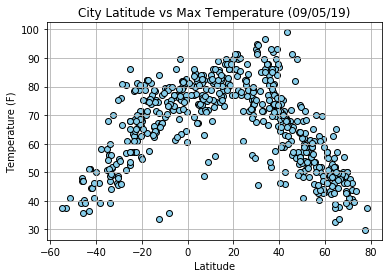

In [32]:
plt.scatter(final_weather_df["Lat"], final_weather_df["Max Temp"], marker="o", facecolors="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({dt})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.axis("auto")
plt.show()

#### Latitude vs. Humidity Plot

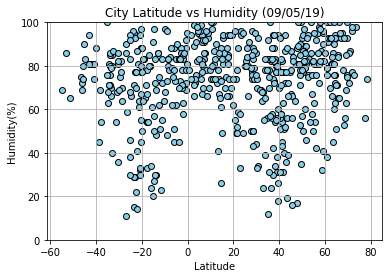

In [34]:
plt.scatter(final_weather_df["Lat"], final_weather_df["Humidity"], marker="o", facecolors="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({dt})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid()
## Putting a limit as there were two extreme outliers
plt.ylim(0,100)
#plt.axis("auto")
plt.show()

#### Latitude vs. Cloudiness Plot

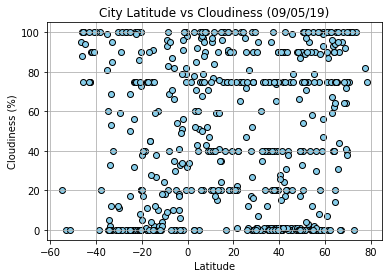

In [35]:
plt.scatter(final_weather_df["Lat"], final_weather_df["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({dt})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.axis("auto")
plt.show()

#### Latitude vs. Wind Speed Plot

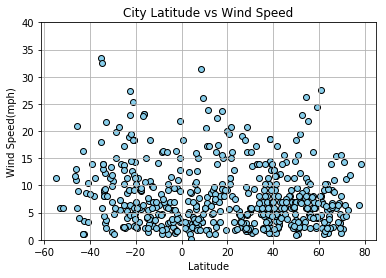

In [36]:
plt.scatter(final_weather_df["Lat"], final_weather_df["Wind Speed"], marker="o", facecolors="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid()
## Putting limit to get rid to two outliers
plt.ylim(0,40)
plt.show()

### OBSERVATIONS
1. I see a prominent coorelation of temperature being higher near the equator and it gradually drops off away from equator on both directions.
2. I do not see a prominent coorelation of wind speed as we move away from the equator.
3. Humidity is high around the equator. But the coorelation is not prominent as we move gruadually away from the equator(as compared to temperature.
4. Overall I have observed high temperature, cloudiness, humidity around equator - but not wind speed.